<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [3]:
#Normalización
scaler = StandardScaler()
columns=[]
no_van=['id','diagnosis']
for i in df.columns:
    if i not in no_van:
        columns.append(i)
x = scaler.fit_transform(df[columns])
y = df.loc[:, no_van].values
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

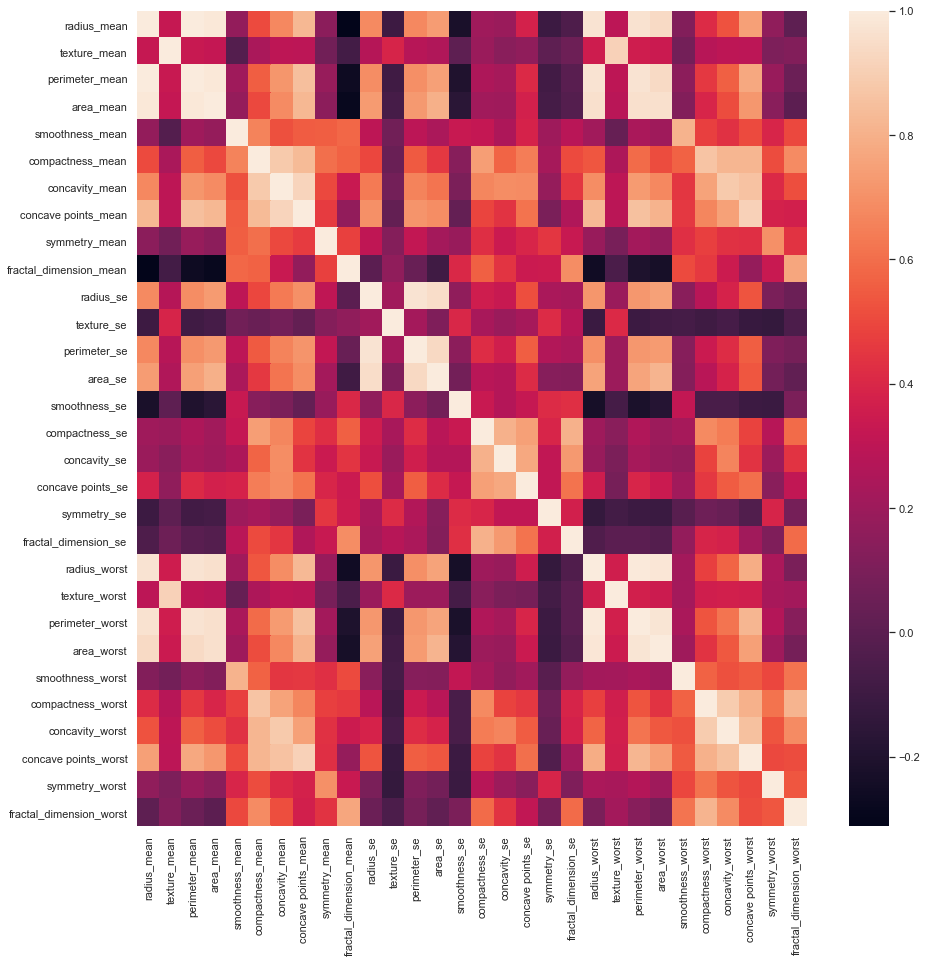

In [4]:
#gráfica de correlación
df_aux=df.drop(['id','diagnosis'],axis=1)
corr=df_aux.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.set_style(style='white')
sns.heatmap(corr)

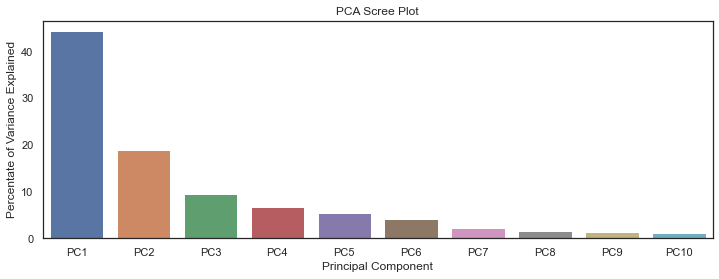

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columnas = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']
plt.figure(figsize=(12,4))
sns.barplot(
    x=columnas,
    y=percent_variance, 
)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [23]:
percent_variance_cum = np.cumsum(percent_variance)

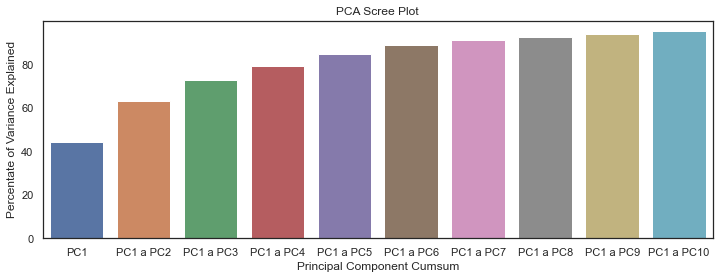

In [24]:
#gráfica varianza acumulada"
columnas_1=['PC1', 'PC1 a PC2', 'PC1 a PC3', 'PC1 a PC4','PC1 a PC5','PC1 a PC6','PC1 a PC7','PC1 a PC8','PC1 a PC9','PC1 a PC10']
plt.figure(figsize=(12,4))
sns.barplot(
    x=columnas_1,
    y=percent_variance_cum, 
)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

La varianza explicada de las variables se puede explicar en 95.15% considerando las 10 componentes

In [28]:
#dataframe componentes principales
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5',
                                                                         'PC6','PC7','PC8','PC9','PC10'])
no_van_Dataframe = df[no_van]
newDataframe = pd.concat([no_van_Dataframe, principalDataframe],axis = 1)
newDataframe.head()

,id,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,842302,1,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157114,-0.877406
1,842517,1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240985,-0.711902,1.106999
2,84300903,1,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097366,0.024058,0.454260
3,84348301,1,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053422,1.429909,1.059556,-1.405453,-1.116995
4,84358402,1,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636382,-0.263805,0.377710
